# 웹 크롤링


## 웹크롤링 정보

* url : https://search.shopping.naver.com/book/catalog/책번호  

In [3]:
# API 통신을 할 때 사용하는 라이브러리
import requests
# 가져온 페이지의 html을 파싱하는 라이브러리
from bs4 import BeautifulSoup
# 그 외 툴들 import
import pandas as pd
import numpy as np

## 웹 크롤링 함수

In [7]:
url_base = "https://search.shopping.naver.com/book/catalog/"
bookno_list = []
# 지정한 url로 페이지를 가져오는 요청을 생성함
# bookno_list : 크롤링할 책의 No

res = requests.get(url)
# url의 requests를 가져요는 것을 res 변수에 담아줌

res.raise_for_status()
soup = BeautifulSoup(res.text, "lxml")
# 요청을 통해 가져온 페이지를 BeautifulSoup로 파싱함
# lxml : html 및 xml의 파싱을 간편하게 도와주는 라이브러리

In [294]:
# 크롤링 함수 정의

def crawling_naver_books(naver_book_code):
    
    import requests
    from bs4 import BeautifulSoup
    
    url_base = "https://search.shopping.naver.com/book/catalog/"
    url = url_base + str(naver_book_code)
    
    # headers : 유저 정보를 넣는 곳. 크롤링은 bot으로 인식되는 데 비해, header에 userinfo를 넣으면 유저로 인식함
    # 유저정보 찾는 사이트 : https://www.useragentstring.com/
    headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36'}
    
    res = requests.get(url, headers=headers)
    res.raise_for_status()
    soup = BeautifulSoup(res.text, 'lxml')
    
    return soup

In [449]:
# 크롤링에서 필요한 정보만 pick 하는 함수

def pick_books_info(naver_book_code):
    
    import pandas as pd
    import numpy as np
    
    data = crawling_naver_books(naver_book_code)
    
    try:
        title = str(data.find('h2', attrs={'class' : 'bookTitle_book_name__JuBQ2'})).replace('<h2 class="bookTitle_book_name__JuBQ2">','').replace('</h2>','') # 책 제목
        subtitle = str(data.find('span', attrs={'class' : 'bookTitle_sub_title__B0uMS'})).replace('<span class="bookTitle_sub_title__B0uMS">','').replace('</span>','') # 책 subtitle
        author = str(data.find_all('div', attrs={'class' : 'bookTitle_info_content__iHfCC'})[0]).replace('<div class="bookTitle_info_content__iHfCC"><span class="bookTitle_inner_content__REoK1">','').replace('</span></div>','') # 저자
        publisher = str(data.find_all('div', attrs={'class' : 'bookTitle_info_content__iHfCC'})[1]).replace('<div class="bookTitle_info_content__iHfCC"><span class="bookTitle_inner_content__REoK1">','').replace('</span></div>','') # 출판사
        release_date = str(data.find_all('div', attrs={'class' : 'bookTitle_info_content__iHfCC'})[2]).replace('<div class="bookTitle_info_content__iHfCC"><span class="bookTitle_inner_content__REoK1">','').replace('</span></div>','') # 출간일
        category = str(data.find_all('div', attrs={'class' : 'bookBasicInfo_info_detail__I0Fx5'})[0]).replace('<div class="bookBasicInfo_info_detail__I0Fx5">','').replace('</div>','')
        isbn = str(data.find_all('div', attrs={'class' : 'bookBasicInfo_info_detail__I0Fx5'})[2]).replace('<div class="bookBasicInfo_info_detail__I0Fx5">','').replace('</div>','')
        pages = int(str(data.find_all('span', attrs={'class' : 'bookBasicInfo_spec__qmQ_N'})[0]).replace('<span class="bookBasicInfo_spec__qmQ_N">','').replace('<!-- -->쪽</span>','').replace(',',''))
        weight = int(str(data.find_all('span', attrs={'class' : 'bookBasicInfo_spec__qmQ_N'})[1]).replace('<span class="bookBasicInfo_spec__qmQ_N">','').replace('<!-- -->g</span>','').replace(',',''))
        introduce = str(data.find_all('div', attrs={'class' : 'infoItem_info_item__1Nm8P'})[0].find('div', {'class' : 'infoItem_data_text__bUgVI'})).replace('<div class="infoItem_data_text__bUgVI">','').replace('<br/>','').replace('</div>','')
        preview = str(data.find_all('div', attrs={'class' : 'infoItem_info_item__1Nm8P'})[1].find('div', {'class' : 'infoItem_data_text__bUgVI'})).replace('<div class="infoItem_data_text__bUgVI">','').replace('<br/>','').replace('</div>','')
        price = int(str(data.find('div', attrs={'class' : 'bookSeller_price__opK_s'})).replace('<div class="bookSeller_price__opK_s"><em>','').replace('</em>원</div>','').replace(',',''))
        review_count = int(str(data.find('strong', attrs={'class' : 'bookReviewSort_num__QIPV_'})).replace('<strong class="bookReviewSort_num__QIPV_">','').replace('</strong>',''))
        rate = float(str(data.find('em', attrs={'class' : 'reviewGrade_grade__Dv0LD'})).replace('<em class="reviewGrade_grade__Dv0LD">','').replace('</em>',''))
        naver_book_code = naver_book_code
        
        # book_big = 
        # book_content_list = 

        book_info = {'title' : title, 'subtitle' : subtitle, 'author' : author, 'publisher' : publisher,
                     'release_date' : release_date, 'category' : category, 'isbn' : isbn, 'pages' : pages, 'weight' : weight,
                     'introduce' : introduce, 'preview' : preview, 'price' : price, 'review_count' : review_count,
                     'rate' : rate, 'naver_book_code' : naver_book_code}
    
    except:
        book_info = "해당하는 책 정보가 없습니다"
    
    return book_info

    

## 웹 크롤링 실행부 

In [461]:
# 찾고자 하는 책 no
naver_book_code = input('네이버 책 no를 입력해주세요')

# 책 정보 불러오기
data = pick_books_info(naver_book_code)
data

네이버 책 no를 입력해주세요 32442171957


{'title': '한낮의 우울',
 'subtitle': '내면의 어두운 그림자, 우울의 모든 것',
 'author': '앤드루 솔로몬',
 'publisher': '민승남',
 'release_date': '민음사',
 'category': '심리학일반',
 'isbn': '9788937417573',
 'pages': 1028,
 'weight': 1396,
 'introduce': '『한낮의 우울』 20주년 기념, 100여 쪽의 한 챕터가 추가된 개정판 출간!“프로이트는 우울증 환자가 ‘진실을 더 날카롭게 직시한다.’고 했는데, 앤드루 솔로몬이 바로 그런 경우다.” -《뉴요커》출판사에 재출간 문의가 가장 많은 타이틀이었던 『한낮의 우울』이 다시 출간되었다. 100여 쪽의 챕터 하나가 추가되었으며, 저자가 2001년에 출간한 지 20주년이 되었다. 『한낮의 우울』은 우아한 문장으로 우울증의 사회적 의미와 인간 본성의 깊이를 모두 탐색하면서 우울함에 대한 모든 것을 담아낸 방대한 저작이다. 국내에서도 2004년에 번역 출간된 이후 우울증 분야 최고의 책으로 평가받아 왔으며, 병리학적 증세뿐 아니라 심리, 철학, 역사, 문학 전 영역에서 다양한 통찰을 주는 논픽션 분야 고전으로 자리 잡게 되었다. “모든 사람들이 『한낮의 우울』에서 자기 내면의 한 부분을 발견할”(《슬레이트》) 것이다.  “ 나는 『한낮의 우울』을 집필하면서 전문적인 우울증 환자가 되었으며, 그건 괴상한 존재다. 이 책이 내 모교의 한 강의에서 교재로 선정되면서 나는 강사로 초빙을 받았다. 학부 시절에 나는 그 대학교에서 교재로 채택될 만큼 훌륭한 책을 쓰는 작가가 되기를 꿈꾸었지만, 그런 꿈을 이루어 준 책이 ‘이상심리’ 수업에 쓰이는 회고록이 될 줄은 몰랐다.” -앤드루 솔로몬, 『한낮의 우울』에서 소설가이자 저널리스트인 앤드루 솔로몬이 우울증이라는 주제에 관심을 갖기 시작한 것은 우울증이 현대 사회에 널리 만연해 있다는 사실과 그 심각성을 깨달았기 때문이다. 『한낮의 우울』은 자신의 

In [451]:
# 찾고자 하는 책 리스트
list_book = []

# for문
list_info = []
for i in range(list_book):
    list_info.append(pick_books_info(i))

# 찾은 정보 리스트
list_info

TypeError: 'list' object cannot be interpreted as an integer

# API 크롤링

## Naver API 크롤링 정보  

* 파라미터  
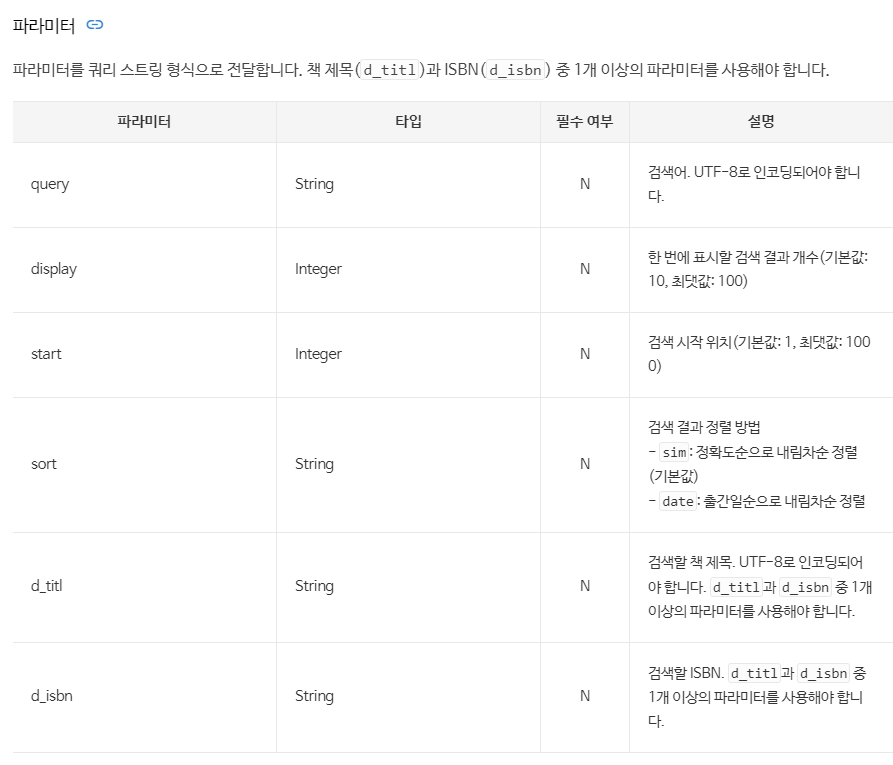  
  
* 응답  
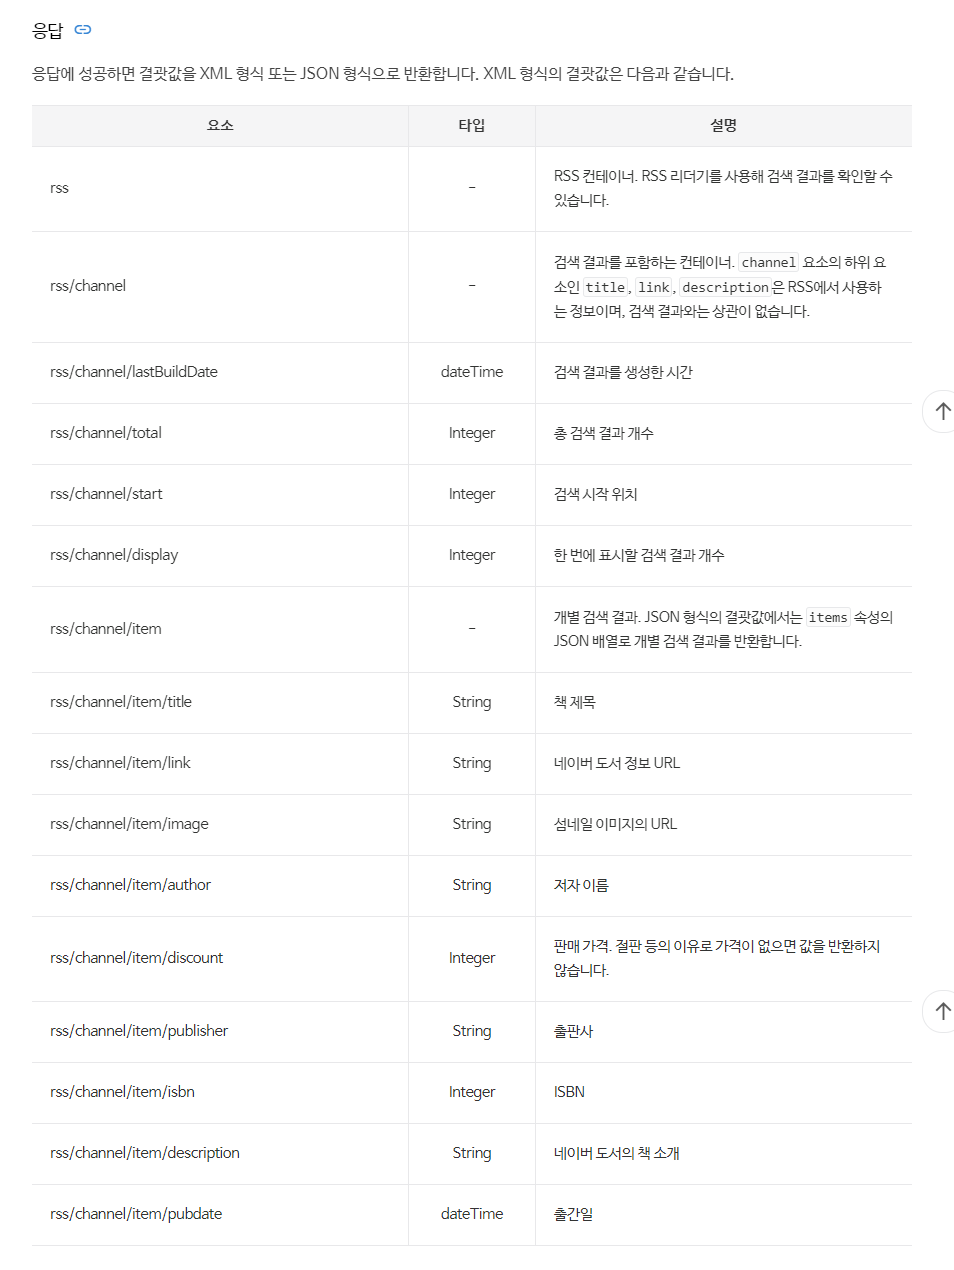  

## Naver API 크롤링 함수

In [404]:
def crawling_api_by_keyword(query):
    import os
    import sys
    import urllib.request
    import json
    client_id = "lMuyiaTfkSHyKG6Yd6A8"
    client_secret = "WXc_ifFeTX"
    encText = urllib.parse.quote(query)
    url = "https://openapi.naver.com/v1/search/book?query=" + encText # JSON 결과
    # url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request)
    rescode = response.getcode()
    if(rescode==200):
        response_body = response.read()
        data = json.loads(response_body)
        return data
    else:
        return str("Error Code:" + rescode)

In [454]:
# 네이버 api 크롤링 데이터프레임화
def crawling_api_by_keyword_df():
    query = input('검색할 단어를 입력해주세요.')
    list_book = crawling_api_by_keyword(query).get('items')

    title = []
    author = []
    price = []
    publisher = []
    pubdate = []
    isbn = []
    description = []
    keyword = []
    naver_book_code = []

    for i in list_book:
        title.append(i.get('title'))
        author.append(i.get('author'))
        price.append(i.get('discount'))
        publisher.append(i.get('publisher'))
        pubdate.append(i.get('pubdate'))
        isbn.append(i.get('isbn'))
        description.append(i.get('description'))
        keyword.append(query)
        naver_book_code.append(i.get('link').split('/')[-1])

    import pandas as pd
    df_book_info = pd.DataFrame(data = list(zip(title,author,price,publisher,pubdate,isbn,description,keyword,naver_book_code)),
                                columns=['title', 'author', 'price', 'publisher', 'pubdate', 'isbn', 'description','keyword','naver_book_code'])
    
    return df_book_info

## API 크롤링 실행부

In [437]:
# 정보 불러오기
query = input('검색어를 입력해주세요')
data = crawling_api_by_keyword(query)
data

검색어를 입력해주세요 파이썬의 정석


{'lastBuildDate': 'Thu, 01 Dec 2022 16:30:30 +0900',
 'total': 1,
 'start': 1,
 'display': 1,
 'items': [{'title': '파이썬의 정석 (파이썬 본질에 집중하다)',
   'link': 'https://search.shopping.naver.com/book/catalog/32464077550',
   'image': 'https://shopping-phinf.pstatic.net/main_3246407/32464077550.20221019124141.jpg',
   'author': '시바타 보요',
   'discount': '23400',
   'publisher': '루비페이퍼',
   'pubdate': '20210301',
   'isbn': '9791186710623',
   'description': '파이썬은 결코 쉬운 언어가 아니다\n\n파이썬은 간결하기 때문에 배우기 쉽다고 알려졌지만, 반드시 그렇지만도 않다. 간결하게 작성할 수 있다는 것은 짧은 코드 안에 깊은 의도가 담겨있기 때문이다. 그러므로 파이썬을 학습할 때는 반드시 식 하나하나, 명령어 하나하나의 의미를 제대로 이해해야 한다.\n따라서 이 책은 파이썬과 프로그래밍 기초를 균형 있게 다뤄 체계적이고 꼼꼼하게 학습할 수 있도록 기획되었다. 특히 기초가 중요하다는 저자의 지론에 따라 여러분이 큰 그림을 놓치지 않고 파이썬이라는 언어의 길, 그리고 프로그래밍의 길을 조금씩 걸어갈 수 있도록 기초 지식을 탄탄하게 구성했다. 이 책의 모든 내용은 파이썬 공식 문서에 근거하여 본질을 깊고 자세히 다루기 때문에 파이썬 초보자뿐만 아니라 다른 개발 언어를 경험한 프로그래머도 만족할 수 있을 것이다.'}]}

In [458]:
# 데이터프레임화
df = crawling_api_by_keyword_df()
df

검색할 단어를 입력해주세요. 우울


,title,author,price,publisher,pubdate,isbn,description,keyword,naver_book_code
0,"한낮의 우울 (내면의 어두운 그림자, 우울의 모든 것)",앤드루 솔로몬,32490,민음사,20210519,9788937417573,"『한낮의 우울』 20주년 기념, 100여 쪽의 한 챕터가 추가된 개정판 출간!\n\...",우울,32442171957
1,"과거가 남긴 우울 미래가 보낸 불안 (후회, 자책, 걱정, 초조를 멈추는 심리학)",김아라,15300,유노북스,20220804,9791192300214,어제와 비교하지 말고 내일을 짐작하지 마세요\n잘 자는 방법부터 좋은 관계를 유지하...,우울,33642467648
2,추락 (우울증 심연 일기),마드무아젤 카롤린,18000,이숲,20181115,9791186921647,"가장 내면적인 이야기, 나약함과 가장 큰 고통에 대한 이야기!\n\n7년간 세 차례...",우울,32548850177
3,마치 우울하고 예민한 내가 죽기라도 바라는 것처럼 (자해 없는 우울 에세이),정하,15030,잇다름,20210920,9791197560224,"“평생을 시달려 온 형체 없는 우울, 나는 이제 그 실체를 직면해보려고 한다.”\n...",우울,32487175111
4,너의 우울이 길다,황경민,4500,글상걸상,20170905,9791195759668,카페 헤세이티 입간판 내용의 정수를 모은 병풍 미니도서\n\n『너의 우울이 길다』는...,우울,32441782732
5,우울한 기분은 식탁에서 생긴다,김이서,15120,메이킹북스,20220822,9791167912152,어려웠던 건강 지식들을 누구나 쉽게 이해하고 기억에 오랫동안 남도록 감정코치 브롤리...,우울,34431636623
6,우울할 땐 뇌과학 (최신 뇌과학과 신경생물학은 우울증을 어떻게 해결하는가),앨릭스 코브,14690,심심,20180312,9791156757344,마음의 문제를 객관적이면서도 논리적인 방법을 통해 도출된 연구 결과로 보여준다!\n...,우울,32474029906
7,우울의 고백 (인문학 클래식3),샤를 피에르 보들레르,13680,민음사,20220530,9788937470233,“『악의 꽃』이라는 이 잔혹한 책 속에 내 모든 심정과 내 모든 애정과\n내 모든 ...,우울,32666480622
8,우울증이 있는 아동ㆍ청소년 (우울한 감정으로 힘들어하는 아이를 어떻게 도울 것인가?),김유숙,10800,이너북스,20220405,9788992654630,‘어린 나이에 무엇을 알까?’ 혹은 ‘어린아이들이 고민을 해 봤자 얼마나 한다고.’...,우울,32463131623
9,우울,안소연 외 53명,9000,파도,20210924,9791197032172,"프로젝트 〈말투〉는 장기적 프로젝트로 등단하지 않아도, 취미로 쓴 글이어도 누구나 ...",우울,32487746813


# 웹 크롤링 차단 방지

(1) headers 추가 : 봇이 아닌 유저로 인식하도록  
* 크롤링 차단됐을 때 : https://blog.naver.com/kiddwannabe/221185808375  

In [ ]:
(2) time interval 주기  
import time

time.sleep(5) # 5초 대기